In [1]:
# Disabled too many blank lines in python --> settings --> inspection --> python --> coding stlye PEP8 --> added code E303

import numpy as np          # dealing with arrays
import os                   # dealing with directories
import pandas as pd
from tqdm import tqdm       # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion
import matplotlib.pyplot as plt

import pickle as pk
# testing_dir = '/home/moe/Desktop/bambo_Logs/Data/my_dataset/testing/'
# validation_dir = '/home/moe/Desktop/bambo_Logs/Data/my_dataset/validation/'
# training_dir = '/home/moe/Desktop/bambo_Logs/Data/my_dataset/training/'


HOME_DIR = '/home/moe/PycharmProjects/clean_code/'
MAIN_dir = '/home/moe/PycharmProjects/clean_code/Cleaned_code/'
elevator_path = '/home/moe/Desktop/bambo_Logs/Data/elevator_fulldata/process/'
excel_file = '/home/moe/Desktop/bambo_Logs/Data/weight_log_summary_602020.xlsx'
dataset_path = '/home/moe/Desktop/bambo_Logs/Data/my_dataset/'

In [2]:
signalz =np.load(MAIN_dir+'\data_files\/testing_signals_5th_199.npy')

In [3]:
accuracy = []
corrected_sig = []
for i, sig in enumerate(signalz):
    for m , point in enumerate(sig[3]):
        if point <= 1:
            corrected_sig.append(0)
        else:
            corrected_sig.append(point) 
    prd = np.sum(corrected_sig)
    prd1 = '{:.2f}'.format(prd)
    gt = np.squeeze(sig[1])
    mse = np.square(gt-prd)/len(sig[3])
    mae = np.abs(gt-prd)
    # 
    if gt != 0:
        ACC = np.ceil((1-((mae+1)/(gt+1))-.000001)*100)
        if ACC > 60:
            accuracy.append(ACC)
    corrected_sig.clear()

In [14]:
for n, item in enumerate(accuracy):
    print(n, item)

print(accuracy)

0

93.0

1

98.0

2

98.0

3

86.0

4

100.0

5

97.0

6

100.0

7

89.0

8

95.0

9

76.0

10

100.0

11

98.0

12

95.0

13

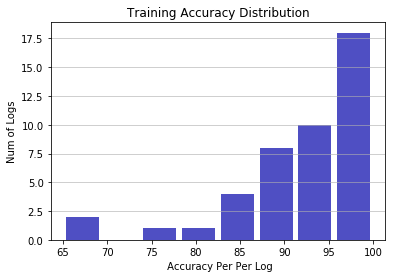

In [6]:
# plt.figure(figsize=(20, 20))
n, bins, patches = plt.hist(accuracy, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of Logs')
plt.xlabel(' Accuracy Per Per Log')
plt.title('Training Accuracy Distribution')
# plt.text(30, 50, r'$\mu=10, b=5$')
max_freq = n.max()
# plt.ylim(top=np.ceil(max_freq / 10) * 10 if max_freq % 10 else max_freq + 10)
# plt.xlim(right=3)
# plt.show()
plt.savefig(MAIN_dir+'\Signals\/validation_accuracy.png', dpi=1200)


Summary

Log length:

410.0

Ground Truth:

624.0

Prediction:

641.89

Accuracy:

97.13

%

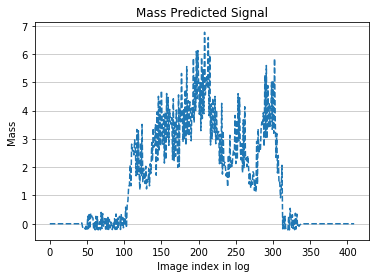

In [33]:
corrected_sig = []
scaled_volume = []

# val = 7
# test = 6
# train = 8

x = 7
for i, sig in enumerate(signalz):

    
    if i>=x:
        for m , point in enumerate(sig[3]):
            scaled_volume.append(sig[4][m]/10)
            if point <= 1:
                corrected_sig.append(0)
            else:
                corrected_sig.append(point) 
        prd = np.sum(corrected_sig)
        prd1 = '{:.2f}'.format(prd)
        gt = np.squeeze(sig[1])
        mse = np.square(gt-prd)/len(sig[3])
        mae = np.abs(gt-prd)
        ACC = (1-mae/gt)*100
        ACC1 = '{:.2f}'.format(ACC)
        max_ = np.max(corrected_sig)
        print('Summary')
        # print('Log name:', sig[0])
        print('Log length:', sig[2])
        print('Ground Truth:', gt, 'Prediction:', prd1)
        print('Accuracy:', ACC1,'%')
        # print('MSE:', mse, 'MAE:', mae, 'Accuracy:', ACC,'%')

        plt.grid(axis='y', alpha=0.75)
        plt.ylabel('Mass')
        plt.xlabel(' Image index in log')
        plt.title('Mass Predicted Signal')
        plt.plot(sig[3], '--')
        # # plt.ylim(top=np.ceil(max_ / 10) * 10 if max_ % 10 else max_ + 10)
        # plt.show()
        # plt.text(0, 6, r'$Ground Truth=$')
        # plt.text(120, 6, str(gt))
        # plt.text(0, 5, r'$Prediction=$')
        # plt.text(100, 5, str(prd1))
        # plt.text(0, 4, r'$Accuracy=$')
        # plt.text(100, 4, str(ACC1))
        # plt.text(145, 4, '%')
        plt.savefig(MAIN_dir+'\Signals\mass_validation.png', dpi=1200)

        
        # corrected_sig.clear()
        # plt.ylabel('Volume')
        # plt.xlabel(' Image index in log')
        # plt.title('Volume Signal')
        # plt.plot(sig[4], 'r--')
        # # max_1 = np.max(sig[4])
        # # plt.ylim(top=np.ceil(max_1 / 10) * 10 if max_1 % 10 else max_1 + 10)
        # plt.show()

        # plt.savefig(MAIN_dir+'\Signals\/volume_mass_validation.png' , dpi=1200)
    # if i>(x+4):
    #     break
        break